In [3]:
import pymaid
# HTTP_USER AND HTTP_PASSWORD are only necessary if your server 
# requires a http authentification
rm = pymaid.CatmaidInstance( 'www.your.catmaid-server.org' , 
                              'HTTP_USER' , 
                              'HTTP_PASSWORD', 
                              'TOKEN' )

INFO  : Global CATMAID instance set. (pymaid.fetch)


In [53]:
# Get two neurons by their skeleton ID
neuron_list = pymaid.get_neuron ( ['57311','27295'] )
# Get a summary of neurons in the list
neuron_list

,neuron_name,skeleton_id,n_nodes,n_connectors,n_branch_nodes,n_end_nodes,open_ends,cable_length,review_status,soma
0,PN glomerulus DA1 57312 LK,57311,4874,421,156,163,105,1180.597489,NA,True
1,PN glomerulus DA1 27296 BH,27295,9969,463,211,218,58,1590.676589,NA,True


In [5]:
# To access individual neurons, use neuron_list 
# like a normal list object
neuron_list[0]

type              <class 'pymaid.core.CatmaidNeuron'>
neuron_name                PN glomerulus DA1 57312 LK
skeleton_id                                     57311
n_nodes                                          4874
n_connectors                                      421
n_branch_nodes                                    156
n_end_nodes                                       163
n_open_ends                                       105
cable_length                                   1180.6
review_status                                      NA
soma                                          3059181
dtype: object

In [6]:
# Note how some entries are "False" or "NA"?
# These are still empty and will be retrieved/computed on-demand 
# upon first *explicit* request
neuron_list[0].review_status

90

In [ ]:
# Interactive 3D plot
neuron_list.plot3d()

INFO  : Done. Use matplotlib.pyplot.show() to show plot. (pymaid.plotting)


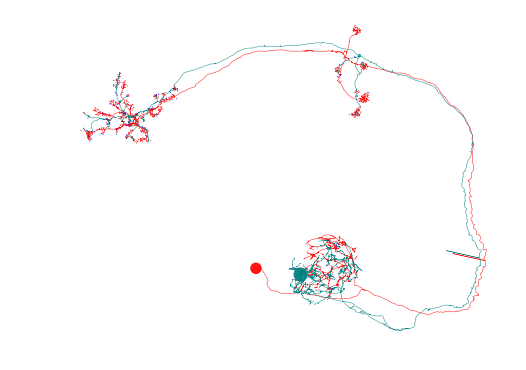

In [55]:
# Matplotlib 2D plot
import matplotlib.pyplot as plt

fig, ax = neuron_list.plot2d()
plt.show()

In [9]:
import pymaid
neuron = pymaid.CatmaidNeuron( 16 )
neuron

type              <class 'pymaid.core.CatmaidNeuron'>
neuron_name                                        NA
skeleton_id                                        16
n_nodes                                            NA
n_connectors                                       NA
n_branch_nodes                                     NA
n_end_nodes                                        NA
n_open_ends                                        NA
cable_length                                       NA
review_status                                      NA
soma                                               NA
dtype: object

In [10]:
# Retrieve the name of the neuron on-demand
neuron.neuron_name

'PN glomerulus VA6 017 DB'

In [ ]:
neuron.set_remote_instance( server_url = 'url', 
                            http_user = 'user', 
                            http_pw = 'pw', 
                            auth_token = 'token' ) 

In [12]:
neuron = pymaid.CatmaidNeuron( 16, remote_instance = rm )

type              <class 'pymaid.core.CatmaidNeuron'>
neuron_name                                        NA
skeleton_id                                        16
n_nodes                                            NA
n_connectors                                       NA
n_branch_nodes                                     NA
n_end_nodes                                        NA
n_open_ends                                        NA
cable_length                                       NA
review_status                                      NA
soma                                               NA
dtype: object

In [14]:
neuron = pymaid.get_neuron( 16, remote_instance = rm )
neuron

type              <class 'pymaid.core.CatmaidNeuron'>
neuron_name                  PN glomerulus VA6 017 DB
skeleton_id                                        16
n_nodes                                         12735
n_connectors                                     1984
n_branch_nodes                                    774
n_end_nodes                                       823
n_open_ends                                       280
cable_length                                  2865.99
review_status                                      NA
soma                                          2941309
dtype: object

All functions that explicitly require you to pass a ``skids`` parameter (e.g. :func:`~pymaid.get_neuron`) accept either:

1. skeleton IDs (int or str)
2. neuron name (str, exact match)
3. annotation: e.g. ``'annotation:PN right'``
4. CatmaidNeuron or CatmaidNeuronList object

Some examples:

In [17]:
# Create neuron list from annotation
neuron_list = pymaid.find_neurons( annotations='glomerulus DA1' )

INFO  : Found 19 neurons matching the search parameters (pymaid.fetch)


In [19]:
# Get partners of these neurons
partners = pymaid.get_partners( neuron_list )

INFO  : Fetching connectivity (pymaid.fetch)
INFO  : Done. Found 232 pre-, 831 postsynaptic and 0 gap junction-connected neurons (pymaid.fetch)


In [23]:
import pymaid
rm = pymaid.CatmaidInstance( 'server_url', 
                             'http_user', 
                             'http_pw', 
                             'auth_token')
partners = pymaid.get_partners( [57311,27295] )

INFO  : Fetching connectivity (pymaid.fetch)
INFO  : Done. Found 42 pre-, 309 postsynaptic and 0 gap junction-connected neurons (pymaid.fetch)


In [22]:
rm = connect_adult_em()

INFO  : Global CATMAID instance set. (pymaid.fetch)


In [ ]:
import pymaid
rm2 = pymaid.CatmaidInstance( 'server_url2', 
                              'http_user2', 
                              'http_pw2', 
                              'auth_token2', 
                               set_global=False )
partners = pymaid.get_partners( [57311,27295], 
                                remote_instance = rm2 )

In [ ]:
rm2.set_global()

In [ ]:
# Initialise with project_id 2 (default = 1)
rm = pymaid.CatmaidInstance( 'server_url', 
                             'http_user', 
                             'http_pw', 
                             'auth_token', 
                              project_id = 2 )
# Change project_id on-the-fly
rm.project_id = 1

In [ ]:
import pymaid
rm = pymaid.CatmaidInstance( 'www.your.catmaid-server.org' , 
                             'HTTP_USER' , 
                             'HTTP_PASSWORD', 
                             'TOKEN' )
# Initialise explicitely with a CatmaidInstance
nl = pymaid.CatmaidNeuronList( [57311,27295], remote_instance = rm )
# Initialise without and add later
nl = pymaid.CatmaidNeuronList( [57311,27295] )
nl.set_remote_instance(rm)
# Alternatively
nl.set_remote_instance( server_url = 'www.your.catmaid-server.org', 
                        http_user = 'HTTP_USER', 
                        http_pw = 'HTTP_PASSWORD', 
                        auth_token = 'TOKEN' ) 

In [27]:
import pymaid
# Initialize a new neuron
n = pymaid.CatmaidNeuron( 16 ) 
# Initialize Catmaid connections
rm = pymaid.CatmaidInstance(server_url, http_user, http_pw, token) 
# Add CatmaidInstance to the neuron for convenience    
n.set_remote_instance(rm) 

In [28]:
# Retrieve node data from server on-demand
n.nodes.head() 

INFO  : Retrieving skeleton data... (pymaid.core)


,treenode_id,parent_id,creator_id,x,y,z,radius,confidence,type
0,72,71,2,476776,146627,170320,-1,5,slab
1,1631,1630,2,438630,136225,196920,-1,5,slab
2,125055,125054,12,442271,140503,196920,-1,5,slab
3,217,216,2,465438,140646,176160,-1,5,slab
4,128575,128576,12,491027,170701,149040,-1,5,slab


In [29]:
# Get all nodes with radius larger than -1
n.nodes[ n.nodes.radius > 1 ]

,treenode_id,parent_id,creator_id,x,y,z,radius,confidence,type
12722,2941309,None,4,451292,205574,23800,4039,5,root


In [31]:
n.annotations[:10]

['WTPN2017_olfactory_uPN_right',
 'SCHLEGEL_LHN_Nov2017',
 'WT Meeting 11/2017',
 'FML - upstream of LH.R DL4 PN',
 'right',
 'Couto et al 1 Glomerulus',
 'LHN_JUNE_2017',
 'uPN right',
 'KCaBc PN',
 'WTPN2017_uPN']

In [35]:
n.get_annotations()
n.annotations[:3]

['WTPN2017_olfactory_uPN_right', 'SCHLEGEL_LHN_Nov2017', 'WT Meeting 11/2017']

In [36]:
nl = pymaid.CatmaidNeuronList( [57311,27295] ) 
nl.skeleton_id

array(['57311', '27295'],
      dtype='<U5')

In [38]:
nl.review_status

array([90, 89])

In [39]:
# Initialize with just a Skeleton ID 
nl = pymaid.CatmaidNeuronList( [57311,27295] )

In [41]:
# Index using node count
subset = nl [ nl.n_nodes > 6000 ]
subset

,neuron_name,skeleton_id,n_nodes,n_connectors,n_branch_nodes,n_end_nodes,open_ends,cable_length,review_status,soma
0,PN glomerulus DA1 27296 BH,27295,9969,463,211,218,58,1590.676589,NA,True


In [42]:
# Index by skeleton ID 
subset = nl.skid [ '57311' ]
subset

type              <class 'pymaid.core.CatmaidNeuron'>
neuron_name                PN glomerulus DA1 57312 LK
skeleton_id                                     57311
n_nodes                                          4874
n_connectors                                      421
n_branch_nodes                                    156
n_end_nodes                                       163
n_open_ends                                       105
cable_length                                   1180.6
review_status                                      NA
soma                                          3059181
dtype: object

In [46]:
# Index by list of skeleton IDs
subset = nl.skid [ [57311,27295] ]
subset

,neuron_name,skeleton_id,n_nodes,n_connectors,n_branch_nodes,n_end_nodes,open_ends,cable_length,review_status,soma
0,PN glomerulus DA1 57312 LK,57311,4874,421,156,163,105,1180.597489,NA,True
1,PN glomerulus DA1 27296 BH,27295,9969,463,211,218,58,1590.676589,NA,True


In [44]:
# Index by neuron name
subset = nl [ 'PN glomerulus DA1 27296 BH' ]
subset

,neuron_name,skeleton_id,n_nodes,n_connectors,n_branch_nodes,n_end_nodes,open_ends,cable_length,review_status,soma
0,PN glomerulus DA1 27296 BH,27295,9969,463,211,218,58,1590.676589,NA,True


In [47]:
# Index by annotation
subset = nl.has_annotation( 'LH_DONE', intersect=False )
subset

,neuron_name,skeleton_id,n_nodes,n_connectors,n_branch_nodes,n_end_nodes,open_ends,cable_length,review_status,soma
0,PN glomerulus DA1 57312 LK,57311,4874,421,156,163,105,1180.597489,NA,True
1,PN glomerulus DA1 27296 BH,27295,9969,463,211,218,58,1590.676589,NA,True


In [48]:
# Concatenate lists
nl += pymaid.get_neuron( [ 16 ] )
nl

,neuron_name,skeleton_id,n_nodes,n_connectors,n_branch_nodes,n_end_nodes,open_ends,cable_length,review_status,soma
0,PN glomerulus DA1 57312 LK,57311,4874,421,156,163,105,1180.597489,NA,True
1,PN glomerulus DA1 27296 BH,27295,9969,463,211,218,58,1590.676589,NA,True
2,PN glomerulus VA6 017 DB,16,12735,1984,774,823,280,2865.992029,NA,True


In [51]:
# Remove item(s)
subset = nl - nl.skid[16]
subset

,neuron_name,skeleton_id,n_nodes,n_connectors,n_branch_nodes,n_end_nodes,open_ends,cable_length,review_status,soma
0,PN glomerulus DA1 57312 LK,57311,4874,421,156,163,105,1180.597489,NA,True
1,PN glomerulus DA1 27296 BH,27295,9969,463,211,218,58,1590.676589,NA,True
